In [6]:

# example of calculating the frechet inception distance in Keras for cifar10
import numpy 
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10

def calculate_fid(act1, act2):
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [7]:
act1 = numpy.random.random(10*2048)
act1 = act1.reshape((10,2048))
act2 = numpy.random.random(10*2048)
act2 = act2.reshape((10,2048))

In [8]:
fid = calculate_fid(act1, act2)

In [9]:
fid

356.40936413035524

In [158]:
import sys
glow_dir = '/project/fashion-flow/glow-edited/'
sys.path.append(glow_dir)
import os
import h5py
import matplotlib.pyplot as plt
import cv2
IMAGE_SIZE = 299
PROJECT_DIR = '/project/fashion-flow'
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
DEEPFASHION_DIR = os.path.join(DATA_DIR, 'DeepFashion', 'FashionSynthesis')
f = h5py.File(os.path.join(DEEPFASHION_DIR, 'G2.h5'), 'r')
segmentations_ds = f['b_']
images_ds = f['ih']

In [159]:
def resize_image(image, size=IMAGE_SIZE):
    return cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)

In [160]:
ghost = resize_image(f['ih_mean'].value.T,size = 32)

In [150]:


imgs = numpy.expand_dims(resize_image(images_ds[0].T) + ghost,0)
print(imgs.shape)
plt.imshow(imgs[0])

ValueError: operands could not be broadcast together with shapes (299,299,3) (32,32,3) 

In [161]:
imgs = numpy.expand_dims(resize_image(images_ds[0].T,size=32) + ghost,0)
for i in range(1,100):
    img = numpy.expand_dims(resize_image(images_ds[i].T,size=32) + ghost,0)
    imgs =numpy.concatenate((imgs,img))

In [162]:
ghost = resize_image(f['ih_mean'].value,size = 299)

In [164]:
imgs2 = numpy.expand_dims(resize_image(imgs[0].T,size=299) + ghost.T,0)
for i in range(1,100):
    img2 = numpy.expand_dims(resize_image(imags[i].T,size=299) + ghost,0)
    imgs2 =numpy.concatenate((imgs,img))

ValueError: operands could not be broadcast together with shapes (299,299,32) (128,299,299) 

In [151]:
imgs2.shape
plt.imshow(imgs2[11])

NameError: name 'imgs2' is not defined

In [140]:
samples = np.load("samples.npy")

In [141]:
samples_res = numpy.expand_dims(resize_image(samples[0]),0)
for i in range(1,100):
    sample_res = numpy.expand_dims(resize_image(samples[0]),0)
    samples_res =numpy.concatenate((samples_res,sample_res))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


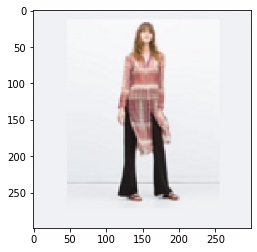

In [142]:
#plt.imshow(samples_res[11])
plt.imshow(imgs[11])

In [143]:
samples_res.shape

(100, 299, 299, 3)

In [144]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# load cifar10 images




In [145]:
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [146]:
# pre-process images
images1 = preprocess_input(imgs.astype('float32'))
images2 = preprocess_input(samples_res.astype('float32'))
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

FID: 536.333
